In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from getdist import plots, MCSamples
import numpy as np
import zeus
print('zeus version:', zeus.__version__)

zeus version: 0.9.2


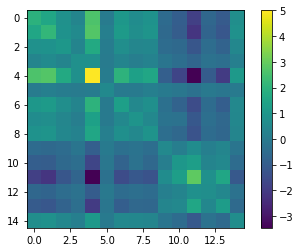

In [17]:
ndim = 15
nwalkers = 2*ndim
nsteps= 5000

C = make_spd_matrix(ndim)
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

mu = np.random.rand(ndim) * 100.0

def logp(x, mu, icov):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

start = np.random.rand(ndim)

In [28]:
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov], mu=2.4)
sampler.run(start, nsteps)

01/11/2019 01:57:11 AM: INFO    : Starting sampling...
100%|██████████| 5000/5000 [00:06<00:00, 784.48it/s]
01/11/2019 01:57:17 AM: INFO    : Sampling Complete!


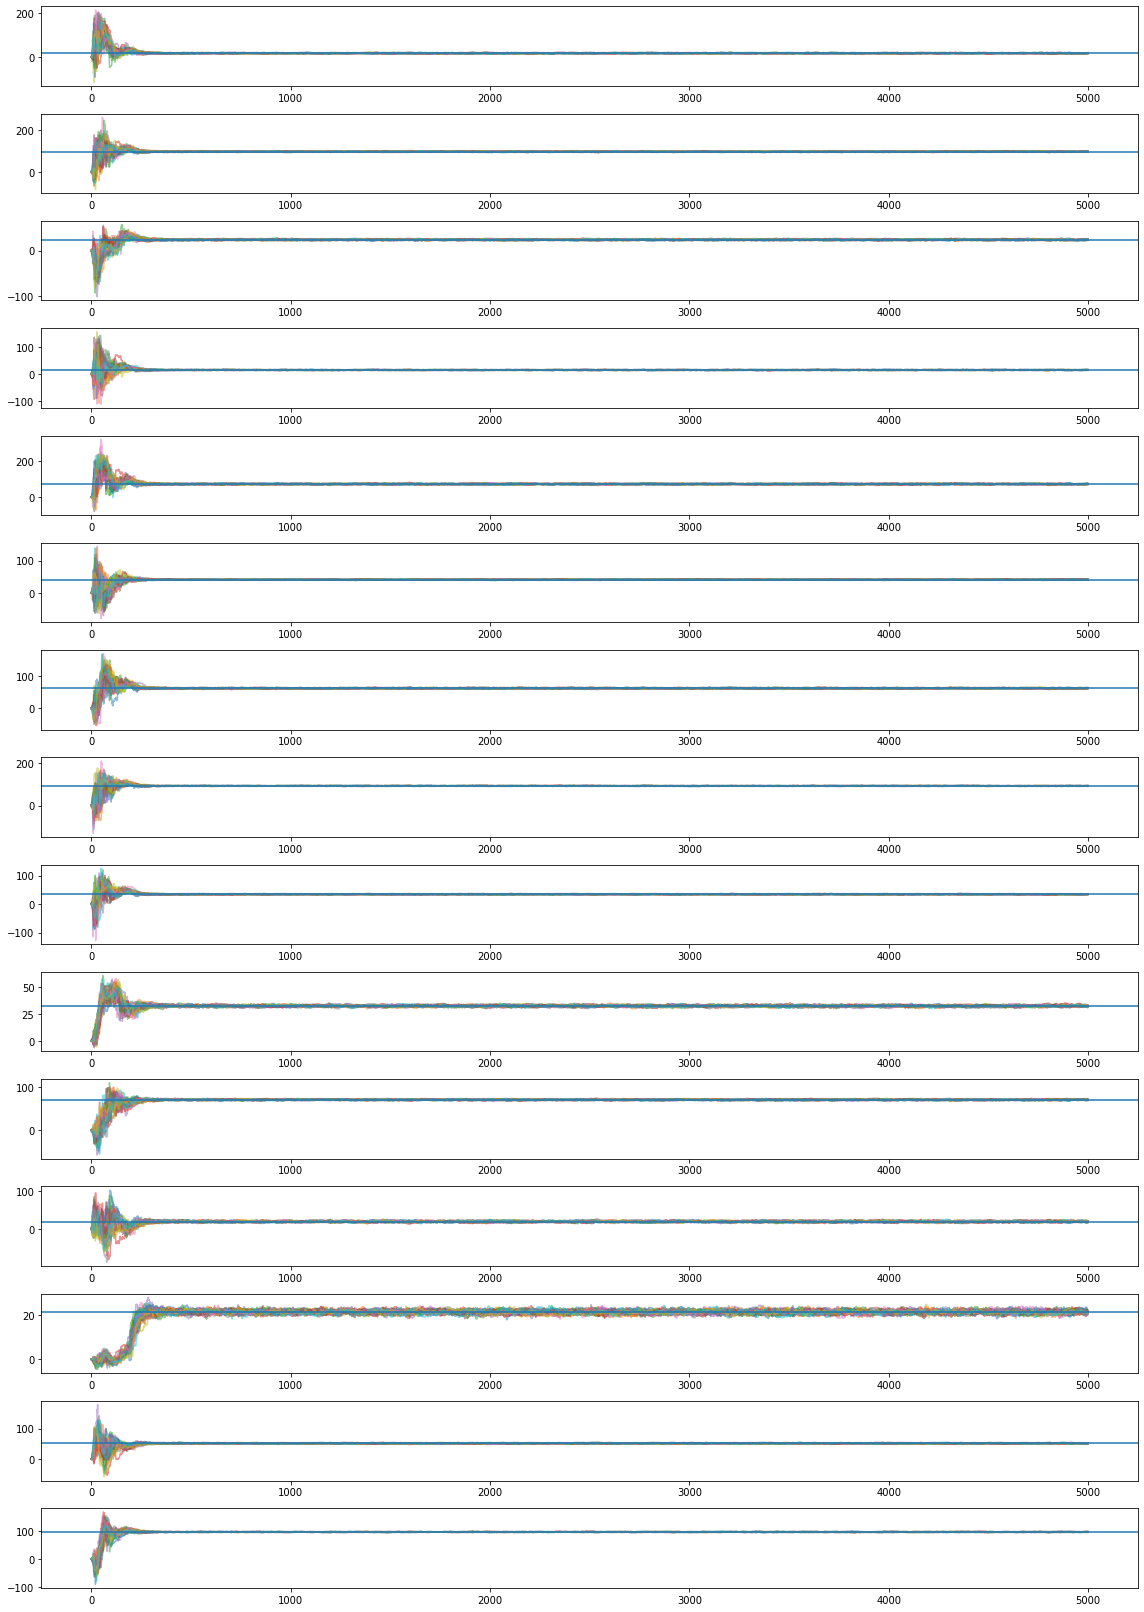

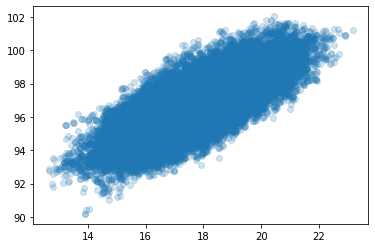

MCMC mean: [17.76140337 96.80632797 24.45325914 15.42236656 73.25082454 41.30192979
 62.40983364 91.93702274 34.78582473 32.50593755 70.41081398 20.37196942
 21.25341314 51.47618538 96.96108084]
TRUE mean: [17.75631941 96.82052502 24.45811116 15.39485493 73.3258517  41.29864307
 62.41544229 91.98460058 34.7841358  32.51176619 70.39551071 20.3207825
 21.28808323 51.45968721 96.98429604]
MCMC std: [1.38364588 1.45253308 1.01812132 0.89638931 2.18862734 0.75078219
 1.13407952 0.95689183 0.92522267 0.73023814 1.01327675 1.68683153
 0.83507255 1.07654283 0.83854467]
TRUE std: [1.40426086 1.46546379 1.01784199 0.89121616 2.23718812 0.754121
 1.14786707 0.96052067 0.94762443 0.73520895 1.01285371 1.70584406
 0.84085366 1.10023043 0.82468753]
act: 23.088434567186635
ESS: 6496.759213514654
ESS/LE: 0.010821817695526452


In [29]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler.chain[:,:,n].T,alpha=0.5)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten()
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()
print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))


act_mean_minas = 0.0
for i in range(ndim):
    act_mean_minas += zeus.autocorrtime(trace[:,i]) 
act_mean_minas /= ndim
print('act:', act_mean_minas)
print('ESS:', nwalkers * nsteps / act_mean_minas)
print('ESS/LE:', (nwalkers * nsteps / act_mean_minas)/sampler.nlogp)

In [6]:
print('Percentiles')
print (np.percentile(trace, [16, 50, 84], axis=0))
print('Mean')
print (np.mean(trace, axis=0))
print('Standard Deviation')
print (np.std(trace, axis=0))

Percentiles
[[66.99724648 88.84746238 92.88731435 23.34978476 13.80568017]
 [67.70259238 90.40838689 93.96616732 24.07158201 15.39246804]
 [68.59643157 91.91405222 95.17925218 24.74054494 16.91138671]]
Mean
[67.75533946 90.35944699 93.99996909 24.05470281 15.37168019]
Standard Deviation
[0.79691247 1.57051891 1.11519717 0.72565132 1.54920315]


Removed no burn in


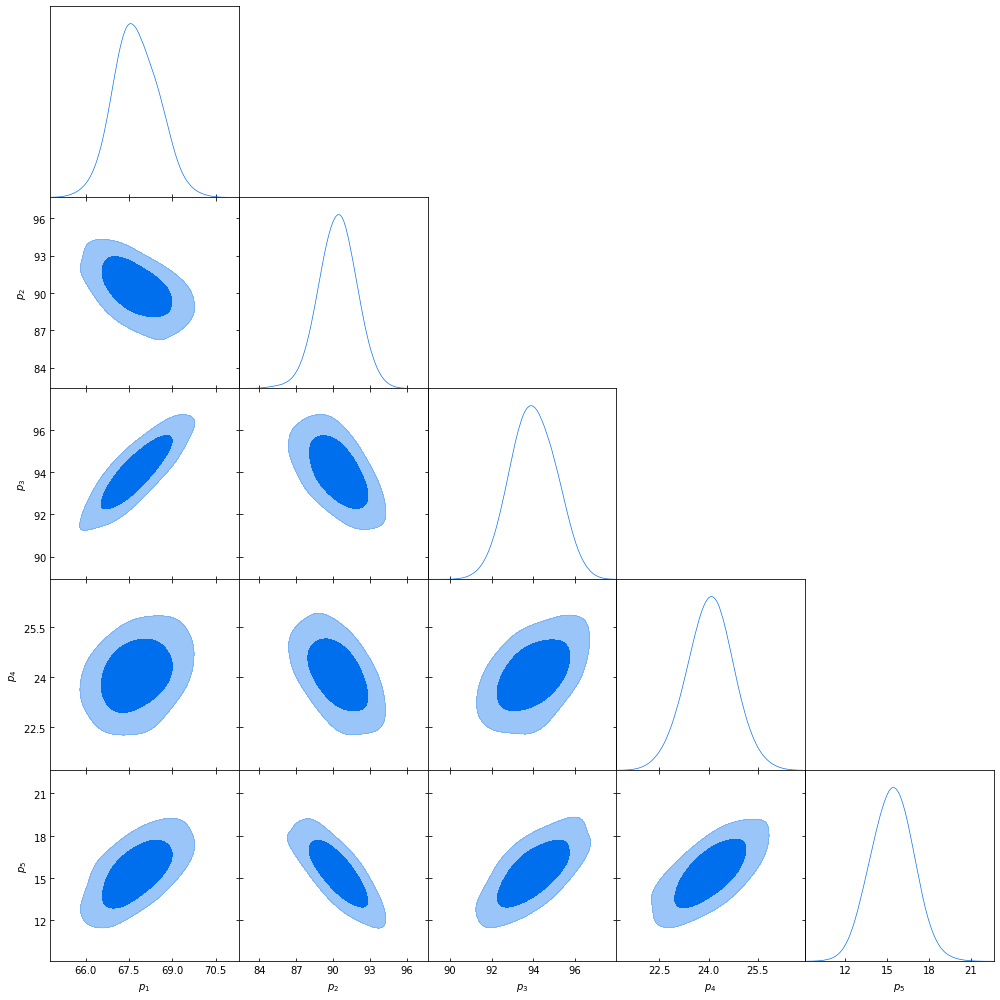

In [7]:
sample = MCSamples(samples=trace)
g = plots.getSubplotPlotter(width_inch=14)
g.triangle_plot([sample], filled=True, shaded=False)